In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [2]:
food = pd.read_csv('./Data/seogyodong+korean.csv')
food.head()

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,시간대_06~11_매출_비율,연령대_20_매출_비율,점포수,한식음식점여부
0,2021,1,1000466,동교로17길,CS100001,한식음식점,243935896,1,14,14,1
1,2021,1,1000466,동교로17길,CS100002,중식음식점,45393178,0,19,1,0
2,2021,1,1000466,동교로17길,CS100003,일식음식점,55589434,0,22,3,0
3,2021,1,1000466,동교로17길,CS100006,패스트푸드점,9925407,5,36,3,0
4,2021,1,1000466,동교로17길,CS100008,분식전문점,40136157,0,30,6,0


In [22]:
cor=food[['분기당_매출_금액','점포수']].corr()
corr=cor.iloc[0,1]

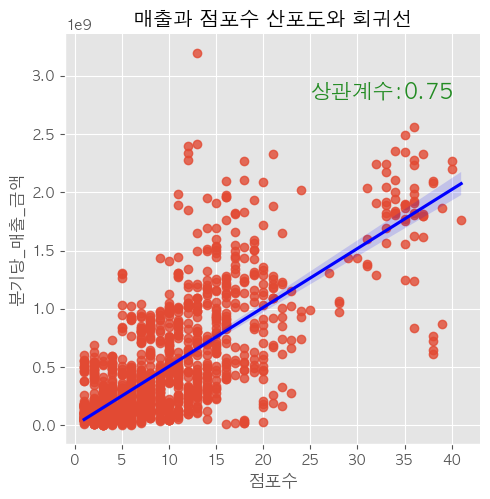

In [34]:
plt.style.use('ggplot')

sns.lmplot(
    x='점포수',
    y='분기당_매출_금액',
    line_kws={'color':'blue'},
    data=food
)

plt.text(
    x=25,
    y=2.8*10**9,
    s=f'상관계수:{round(corr,2)}',
    fontdict={
        'size':15,
        'color':'forestgreen',
        'weight':'bold'
    }
)

plt.title('매출과 점포수 산포도와 회귀선')

plt.show()

### 산점도를 보았을 때 feature로서 가능할 것 같다.
### 선형적인 관계를 가지고 있고, 점포수의 의미가 상권의 유사 서비스 업종의 점포수 이기 때문에 서교동에 외식업관련 창업시에 매출 예측을 위해 이용하는 사용자들이라면 충분히 그상권의 유사 서비스 업종의 점포수를 파악할 것이라고 생각한다. 